In [7]:
import numpy as np

xsL = [(0,1),(0,1)]
qs  = (0,1,2)

if False:
    ys  = ((0,0), (0,1), (1,0), (1,1))

    pX0X1 = np.array([[1, 0.1],[0.2,1]]).astype('float')
    #pX0X1 = np.eye(2)
    pX0X1 /= pX0X1.sum()

    pXY = {}
    for xix, xs in enumerate(xsL):
        pXY[xix] = np.zeros((len(xs),len(ys)))
        for xndx, x in enumerate(xs):
            for yndx, y in enumerate(ys):
                if y[xix] == x:
                    pXY[xix][xndx,yndx] = pX0X1[y[0],y[1]]
                    #print('h x%d=%d y=%s'%(xix, x, y),  y[0],y[1])
        pXY[xix]/=pXY[xix].sum()

    pY = pXY[0].sum(axis=0)
    # print(pY)
    assert(np.allclose(pY, pXY[1].sum(axis=0)))

else:
    ys  = (0,1)
    pYX0X1 = np.random.random((len(ys),len(xsL[0]),len(xsL[1])))
    pYX0X1 /= pYX0X1.sum()
    
    pY = pYX0X1.sum(axis=-1).sum(axis=-1)
    pXY= {}
    pXY[0] = pYX0X1.sum(axis=-1).T
    pXY[1] = pYX0X1.sum(axis=1).T
assert(np.allclose(pY, pXY[0].sum(axis=0)))
assert(np.allclose(pY, pXY[1].sum(axis=0)))


In [19]:
ixs = {}
for q in qs[:-1]:
    for y in ys:
        ixs[('q|y',q,y)] = len(ixs)
for xix, xs in enumerate(xsL):
    for x in xs:
        for q in qs[:-1]:
            ixs[('q|x%d'%xix,q,x)] = len(ixs)
N = len(ixs)
print(ixs)

{('q|y', 0, 0): 0, ('q|y', 0, 1): 1, ('q|y', 1, 0): 2, ('q|y', 1, 1): 3, ('q|x0', 0, 0): 4, ('q|x0', 1, 0): 5, ('q|x0', 0, 1): 6, ('q|x0', 1, 1): 7, ('q|x1', 0, 0): 8, ('q|x1', 1, 0): 9, ('q|x1', 0, 1): 10, ('q|x1', 1, 1): 11}


In [25]:
A = []
for q in qs[:-1]:
    for xix, xs in enumerate(xsL):
        for x in xs:
            r = np.zeros(N)
            r[ixs[('q|x%d'%xix,q,x)]] = 1
            A.append(r)
            

for xix, xs in enumerate(xsL):
    for x in xs:
        r = np.zeros(N)
        for q in qs[:-1]:
            r[ixs[('q|x%d'%xix,q,x)]] = 1
        A.append(r)

B = []

for xix, xs in enumerate(xsL):
    for q in qs:
        for yndx, y in enumerate(ys):
            r = np.zeros(N).astype('str')
            cval = pY[yndx]
            cval = 'pY(%d)'%yndx
            if q == qs[-1]:
                for q2 in qs[:-1]:
                    r[ixs[('q|y',q2,y)]] = 
            else:
                r[ixs[('q|y',q,y)]] = -pY[yndx]
                
            for xndx, x in enumerate(xs):
                cval = -pXY[xix][xndx,yndx]
                cval = 'p(X%d=%d,Y=%d)' % (xix,xndx,yndx)
                if q == qs[-1]:
                    for q2 in qs[:-1]:
                        r[ixs[('q|x%d'%xix,q2,x)]] = cval
                else:
                        r[ixs[('q|x%d'%xix,q,x)]] = cval
            #print(len(B), ('q|y',q,y), ('q|x%d'%xix,q,x))
            B.append(r)


In [26]:
Amx = np.array(A)
Bmx = np.array(B)
Cmx = np.vstack([A,B])
print('shape(A) = %s, rank(A) = %d' % (Amx.shape,np.linalg.matrix_rank(Amx)))
print('shape(B) = %s, rank(B) = %d' % (Bmx.shape,np.linalg.matrix_rank(Bmx)))
print('shape(C) = %s, rank(C) = %d' % (Cmx.shape,np.linalg.matrix_rank(Cmx)))
#print(np.linalg.lstsq(Bmx[1:8].T, Bmx[0]))
#print(np.linalg.matrix_rank(Amx))
#print(np.linalg.matrix_rank(Cmx))


#print(Bmx[7])
#print(Bmx[4]-Bmx[5] + Bmx[6]-Bmx[7])
#print((Bmx[4]-Bmx[5] + Bmx[6]-Bmx[7]).sum())

shape(A) = (12, 12), rank(A) = 8


TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n

[['-0.5424937157308785' '0.0' '0.0' '0.0' 'p(X0=0,Y=0)' '0.0' 'p(X0=1,Y=0)' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '-0.45750628426912154' '0.0' '0.0' 'p(X0=0,Y=1)' '0.0' 'p(X0=1,Y=1)' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '-0.5424937157308785' '0.0' '0.0' 'p(X0=0,Y=0)' '0.0' 'p(X0=1,Y=0)' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' '-0.45750628426912154' '0.0' 'p(X0=0,Y=1)' '0.0' 'p(X0=1,Y=1)' '0.0' '0.0' '0.0' '0.0']
 ['0.5424937157308785' '0.0' '0.5424937157308785' '0.0' 'p(X0=0,Y=0)' 'p(X0=0,Y=0)' 'p(X0=1,Y=0)' 'p(X0=1,Y=0)' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.45750628426912154' '0.0' '0.45750628426912154' 'p(X0=0,Y=1)' 'p(X0=0,Y=1)' 'p(X0=1,Y=1)' 'p(X0=1,Y=1)' '0.0' '0.0' '0.0' '0.0']
 ['-0.5424937157308785' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' 'p(X1=0,Y=0)' '0.0' 'p(X1=1,Y=0)' '0.0']
 ['0.0' '-0.45750628426912154' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' 'p(X1=0,Y=1)' '0.0' 'p(X1=1,Y=1)' '0.0']
 ['0.0' '0.0' '-0.5424937157308785' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' 'p(X1=0

TypeError: Image data cannot be converted to float

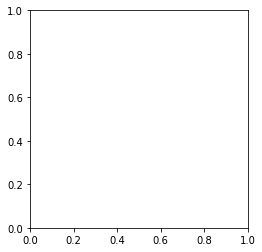

In [29]:
np.set_printoptions(precision=3, linewidth=150)
print(Bmx)
print(ixs)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Bmx)
plt.show()


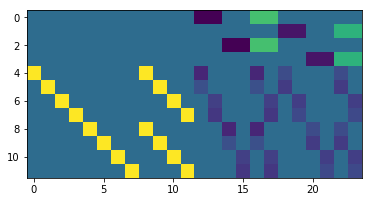

[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.542 -0.542  0.     0.     0.542  0.542  0.     0.     0.
   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.458 -0.458  0.
   0.     0.458  0.458]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.542 -0.542  0.542  0.542  0.     0.     0.
   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.458
  -0.458  0.458  0.458]
 [ 1.     0.     0.     0.     0.     0.     0.     0.     1.     0.     0.     0.    -0.376  0.     0.     0.    -0.376  0.    -0.185  0.     0.
   0.    -0.185  0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.     1.     0.     0.    -0.167  0.     0.     0.    -0.167  0.    -0.273  0.     0.
 

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Cmx.T)
plt.show()
np.set_printoptions(precision=3, linewidth=150)
print(Cmx.T)